# Analysis of LGBM model (Best Results)

In [1]:
# load pickle file train from dataset/train.pkl and target from dataset/target.pkl
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np  
import numpy as np
import lightgbm as lgb 
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


with open('dataset/train.pkl', 'rb') as f:
    train = pickle.load(f)

with open('dataset/target.pkl', 'rb') as f:
    target = pickle.load(f)

train.head()

,building_id,meter,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr
0,0.000442,0.589652,0.027874,0.405518,5.420515,3.800781,0.0,2.400391,0.0
1,0.000885,0.589652,0.027874,0.405518,4.308213,3.800781,0.0,2.400391,0.0
2,0.000885,0.063672,0.027874,0.405518,4.308213,3.800781,0.0,2.400391,0.0
3,0.000442,0.589652,0.027874,0.405518,5.747165,3.800781,0.0,2.400391,0.0
4,0.000442,0.589652,0.027874,0.405518,5.658165,3.800781,0.0,2.400391,0.0


In [2]:
# Define the number of folds for cross-validation
n_splits = 5

# Create an instance of KFold with the specified number of folds
kf = KFold(n_splits=n_splits)

rmse_scores_lightgbm = []

for train_index, test_index in kf.split(train):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Create an instance of lgb.Dataset for the training and testing sets
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_test = lgb.Dataset(X_test, y_test)

    # Define the parameters for the LightGBM model
    params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,
    'learning_rate': 0.09841079471843048,
    'feature_fraction': 0.6146295376710438,
    'bagging_fraction': 0.6360723189013848,
    'bagging_freq': 7,
    'verbose': 0
    }

    # Train the LightGBM model
    model = lgb.train(params, lgb_train, num_boost_round=100)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the RMSE for the current fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Print the RMSE for the current fold
    print("RMSE:", rmse)

    # Append the RMSE to the list of scores
    rmse_scores_lightgbm.append(rmse)


# Calculate the average RMSE across all folds
average_rmse = np.mean(rmse_scores_lightgbm)

# Print the average RMSE
print("Average RMSE:", average_rmse)

In [3]:
# Train the model on the entire dataset
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,
    'learning_rate': 0.09841079471843048,
    'feature_fraction': 0.6146295376710438,
    'bagging_fraction': 0.6360723189013848,
    'bagging_freq': 7,
    'verbose': 0
}

from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)


# Create the LightGBM data containers
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,
    'learning_rate': 0.09841079471843048,
    'feature_fraction': 0.6146295376710438,
    'bagging_fraction': 0.6360723189013848,
    'bagging_freq': 7,
    'verbose': 0
}

# Train the model
final_model = lgb.train(params, train_data, num_boost_round=100)


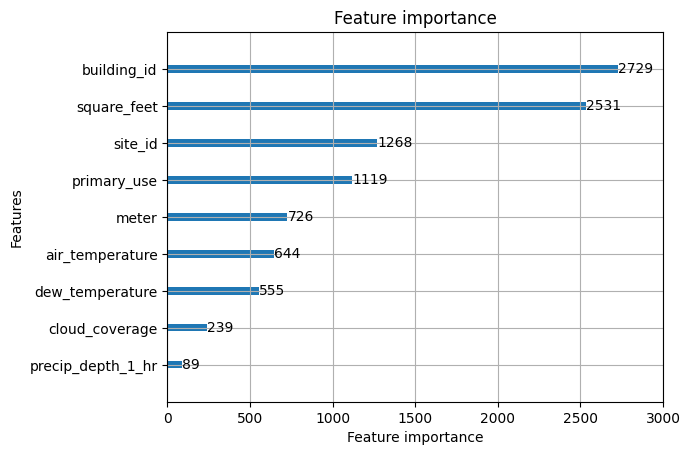

In [4]:
# Feature importance with column names
import matplotlib.pyplot as plt
lgb.plot_importance(final_model, max_num_features=10)
plt.show()


In [5]:
# Predict probabilities
y_pred_proba = final_model.predict(X_test)
# Convert probabilities to binary output
y_pred = np.where(y_pred_proba > 0.5, 1, 0)


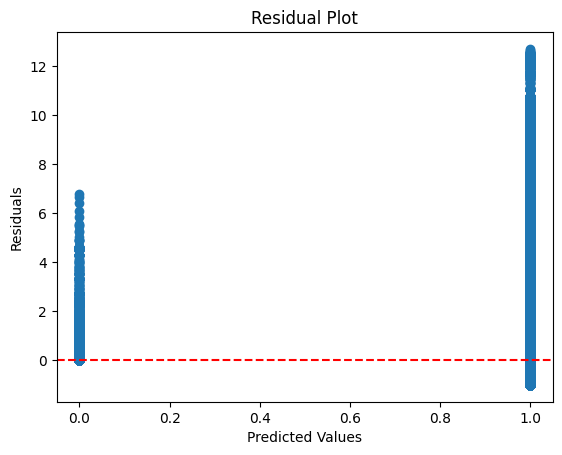

In [10]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


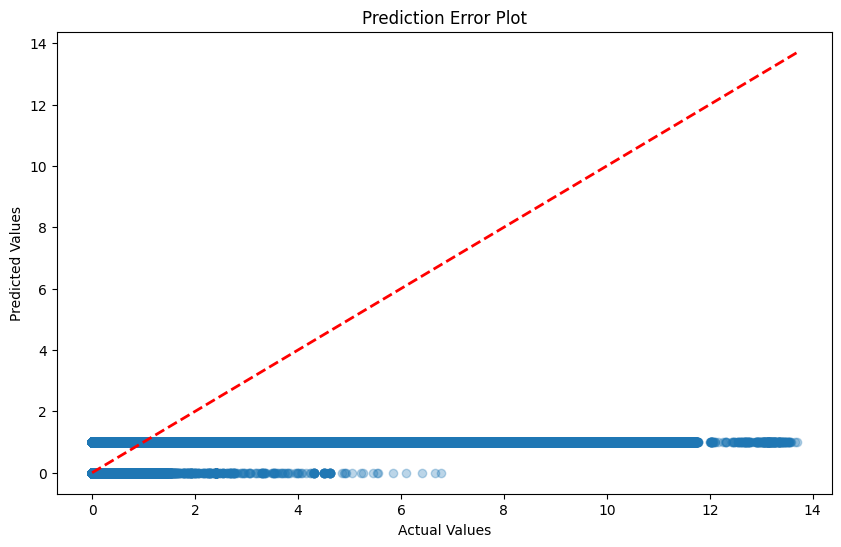

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


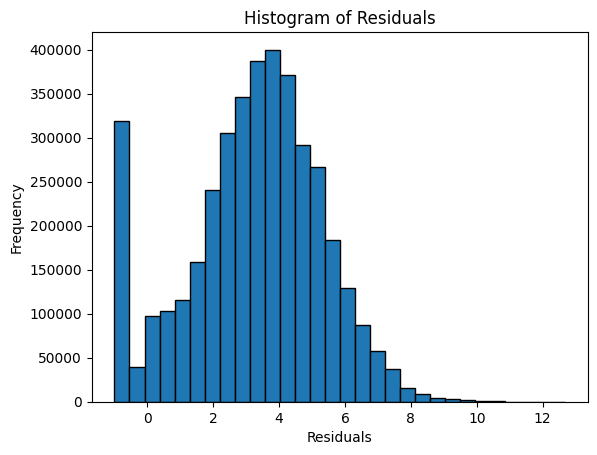

In [12]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


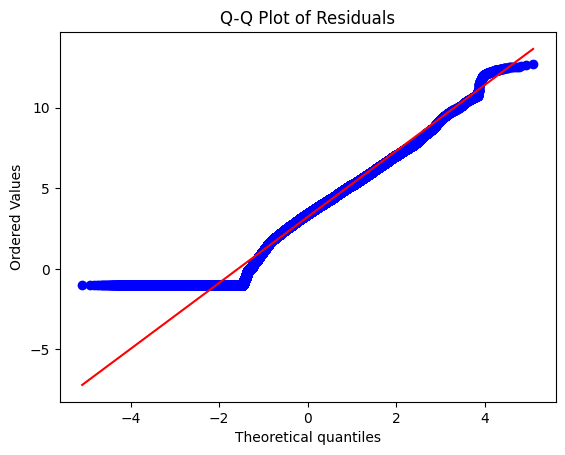

In [13]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


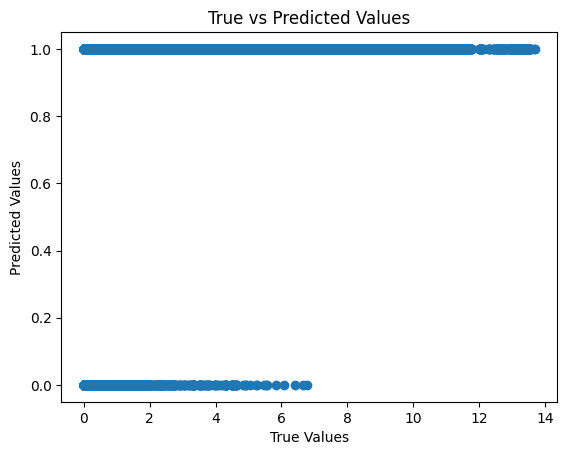

In [15]:
# plot y_test vs y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()



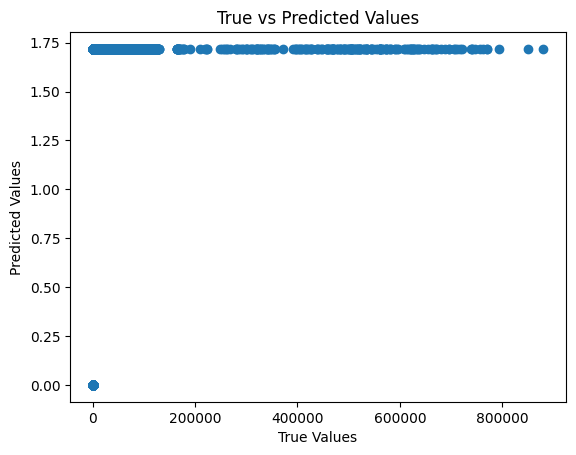

In [16]:
# np.expm1(y_test) and np.expm1(y_pred) to convert the log-transformed values back to the original scale
plt.scatter(np.expm1(y_test), np.expm1(y_pred))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
